# Simple Multimodal RAG System

This notebook demonstrates a simple Multimodal Retrieval-Augmented Generation (RAG) system that can run in Google Colab. It uses CLIP to retrieve relevant images based on text queries, which can enhance image generation prompts.


In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Set this to the folder that contains your notebook/project
PROJECT_DIR = '/content/drive/MyDrive/code/AI-primer/rag/multimodal-rag'
%cd "$PROJECT_DIR"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/code/AI-primer/rag/multimodal-rag


## Step 1: Install Dependencies


In [4]:
%pip install transformers torch pillow requests numpy matplotlib


## Step 2: Import and Setup


In [5]:
import os
from simple_multimodal_rag import SimpleMultimodalRAG, visualize_retrieved_images
from download_images import create_sample_images_from_urls, create_placeholder_images

# Download or create sample images
print("Setting up images...")
try:
    image_files, metadata = create_sample_images_from_urls("images")
except Exception as e:
    print(f"Download failed: {e}")
    print("Creating placeholder images instead...")
    image_files, metadata = create_placeholder_images("images")

print(f"\nReady! Found {len(image_files)} images:")
for f, m in zip(image_files, metadata):
    print(f"  - {f} ({m.get('caption', 'no caption')})")


Setting up images...
✓ Saved to images/landscape_1.jpg (400x300)
✓ Saved to images/nature_1.jpg (400x300)
✓ Saved to images/scenery_1.jpg (400x300)
✓ Saved to images/outdoor_1.jpg (400x300)
✓ Saved to images/view_1.jpg (400x300)

✓ Created 5 sample images in images/

Ready! Found 5 images:
  - images/landscape_1.jpg (A scenic landscape with mountains and trees)
  - images/nature_1.jpg (Natural scenery with vegetation)
  - images/scenery_1.jpg (Beautiful outdoor scenery)
  - images/outdoor_1.jpg (Outdoor landscape view)
  - images/view_1.jpg (Panoramic view of nature)


## Step 3: Initialize Multimodal RAG System


In [6]:
# Initialize the multimodal RAG system
# Using CLIP base model (lightweight and suitable for Colab)
rag = SimpleMultimodalRAG(clip_model_name="openai/clip-vit-base-patch32")

# Load images with metadata
rag.load_images(image_files, metadata)

# Build the embedding index
rag.build_index()


Loaded 5 images
Loading CLIP model: openai/clip-vit-base-patch32
Using device: cuda


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP model loaded successfully!
Building image embedding index...
Index built with 5 image embeddings


## Step 4: Query the System


In [7]:
# Query the multimodal RAG system
query = "red geometric shape"
result = rag.query(query, top_k=3)

print(f"Query: {result['query']}\n")
print(f"Found {result['num_images']} relevant images:\n")
print("="*60)

for i, img_info in enumerate(result['retrieved_images']):
    print(f"\nImage {i+1}:")
    print(f"  Path: {img_info['image_path']}")
    print(f"  Similarity: {img_info['similarity']:.3f}")
    print(f"  Caption: {img_info['metadata'].get('caption', 'N/A')}")


Query: red geometric shape

Found 3 relevant images:


Image 1:
  Path: images/view_1.jpg
  Similarity: 0.210
  Caption: Panoramic view of nature

Image 2:
  Path: images/scenery_1.jpg
  Similarity: 0.202
  Caption: Beautiful outdoor scenery

Image 3:
  Path: images/outdoor_1.jpg
  Similarity: 0.197
  Caption: Outdoor landscape view


## Step 5: Visualize Retrieved Images


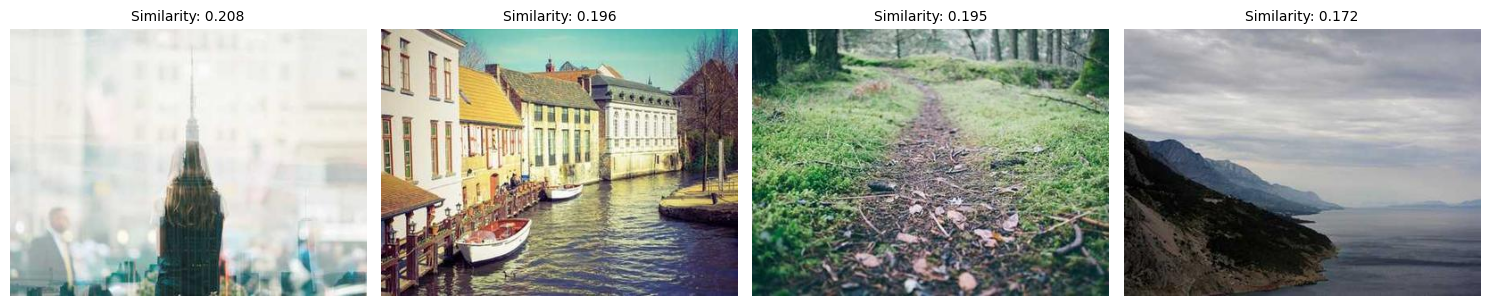

In [8]:
# Visualize the retrieved images
result = rag.query("colorful geometric shapes", top_k=4)
visualize_retrieved_images(result['retrieved_images'], max_display=4)


## Step 6: Enhance Image Generation Prompts


In [9]:
# Original prompt for image generation
original_prompt = "a modern abstract design"

# Enhance the prompt using retrieved images
enhanced_descriptive = rag.enhance_prompt(original_prompt, top_k=2, style="descriptive")
enhanced_concise = rag.enhance_prompt(original_prompt, top_k=2, style="concise")
enhanced_detailed = rag.enhance_prompt(original_prompt, top_k=2, style="detailed")

print("Original prompt:", original_prompt)
print("\nEnhanced (descriptive):", enhanced_descriptive)
print("\nEnhanced (concise):", enhanced_concise)
print("\nEnhanced (detailed):", enhanced_detailed)

print("\n" + "="*60)
print("You can now use these enhanced prompts with image generation models!")
print("Example: generated_image = image_model.generate(enhanced_descriptive)")


Original prompt: a modern abstract design

Enhanced (descriptive): a modern abstract design, inspired by visual styles from: similar to view_1.jpg, similar to scenery_1.jpg

Enhanced (concise): a modern abstract design (style reference: similar to view_1.jpg)

Enhanced (detailed): a modern abstract design
Visual style references:
- similar to view_1.jpg
- similar to scenery_1.jpg

You can now use these enhanced prompts with image generation models!
Example: generated_image = image_model.generate(enhanced_descriptive)


## Step 7: Multiple Queries


In [10]:
queries = [
    "red circle",
    "blue square",
    "geometric shapes",
    "colorful design"
]

for query in queries:
    print(f"\n{'='*60}")
    print(f"Query: {query}")
    print('='*60)
    result = rag.query(query, top_k=2)
    if result['retrieved_images']:
        top_img = result['retrieved_images'][0]
        print(f"Top result (similarity: {top_img['similarity']:.3f}):")
        print(f"  {top_img['image_path']}")
        print(f"  Caption: {top_img['metadata'].get('caption', 'N/A')}")



Query: red circle
Top result (similarity: 0.189):
  images/view_1.jpg
  Caption: Panoramic view of nature

Query: blue square
Top result (similarity: 0.210):
  images/view_1.jpg
  Caption: Panoramic view of nature

Query: geometric shapes
Top result (similarity: 0.219):
  images/view_1.jpg
  Caption: Panoramic view of nature

Query: colorful design
Top result (similarity: 0.202):
  images/view_1.jpg
  Caption: Panoramic view of nature


## Step 8: Save and Load (Optional)


In [11]:
# Save the RAG system
rag.save("multimodal_rag_system.pkl")

# Load it back
rag2 = SimpleMultimodalRAG()
rag2.load("multimodal_rag_system.pkl")

# Test loaded system
result = rag2.query("red shape", top_k=2)
print(f"Loaded system found {result['num_images']} images for query: {result['query']}")


Multimodal RAG system saved to multimodal_rag_system.pkl
Multimodal RAG system loaded from multimodal_rag_system.pkl
Loaded 5 images
Loading CLIP model: openai/clip-vit-base-patch32
Using device: cuda
CLIP model loaded successfully!
Loaded system found 2 images for query: red shape


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Loading Stable Diffusion model...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model loaded successfully!
Generating image with prompt: a modern abstract design
Visual style references:
- similar to view_1.jpg
- similar to scenery_1.jpg


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved to generated_image.png


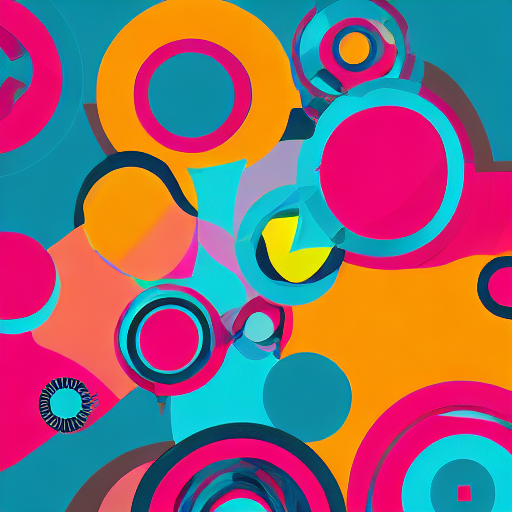

In [13]:
!pip install diffusers transformers accelerate

import torch
from diffusers import AutoPipelineForText2Image

print("Loading Stable Diffusion model...")
# Load a small, fast model for demonstration. For higher quality, consider larger models.
pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True)
pipeline.to("cuda")

print("Model loaded successfully!")

# Use one of the enhanced prompts from earlier
# You can choose enhanced_descriptive, enhanced_concise, or enhanced_detailed
image_generation_prompt = enhanced_detailed # Using the detailed enhanced prompt

print(f"Generating image with prompt: {image_generation_prompt}")

# Generate the image
image = pipeline(prompt=image_generation_prompt).images[0]

# Save the generated image
output_image_path = "generated_image.png"
image.save(output_image_path)

print(f"Image generated and saved to {output_image_path}")
image # Display the image